# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scikitplot
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_circles

Let's generate our dataset and take a look on it.

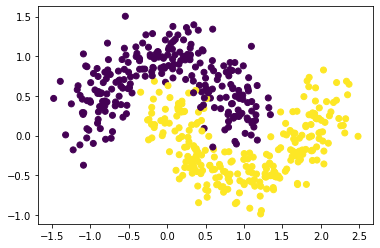

In [4]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

accuracy:  0.86


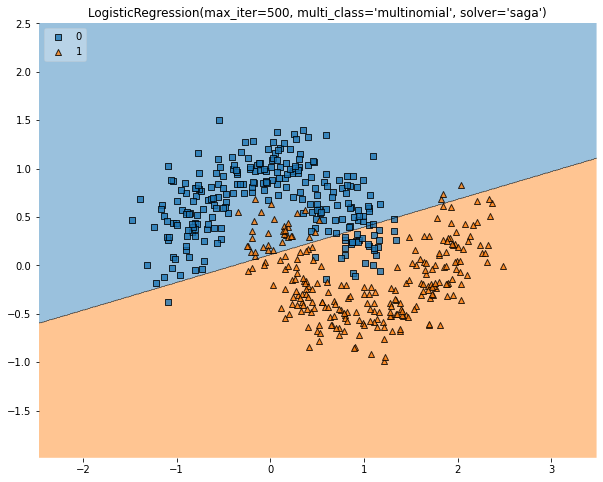

In [162]:
def plot_decisions(X, y, model=LogisticRegression()): 
    # Plotting Decision Regions
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(10, 8))
    
    model.fit(X, y)
    y_pred = model.predict(X)
    print("accuracy: ", accuracy_score(y, y_pred))
    ax = plt.subplot()
    fig = plot_decision_regions(X=X, y=y, clf=model, legend=2)
    plt.title(model)
    plt.show()

model = LogisticRegression(max_iter=500, multi_class='multinomial',solver='saga') # add some params
#model = SVC(kernel='linear') # here too 
plot_decisions(moons_points,moons_labels, model)


## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

accuracy:  0.906


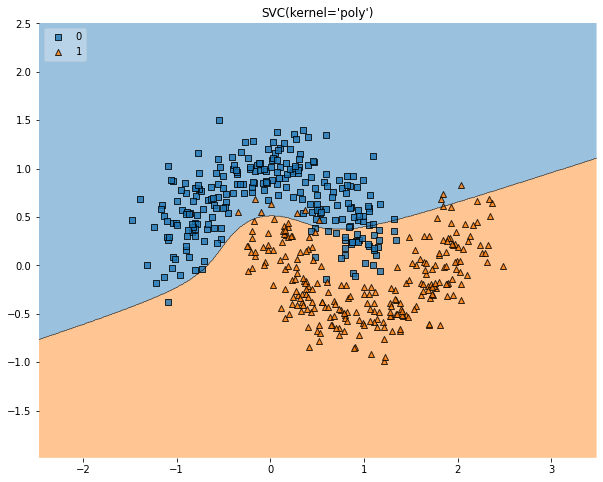

accuracy:  0.974


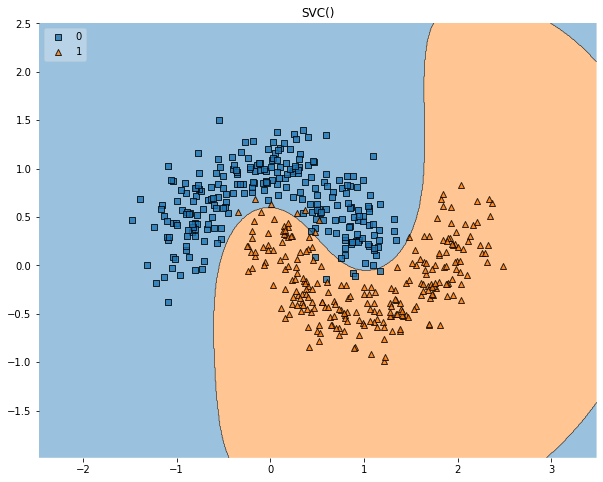

accuracy:  0.648


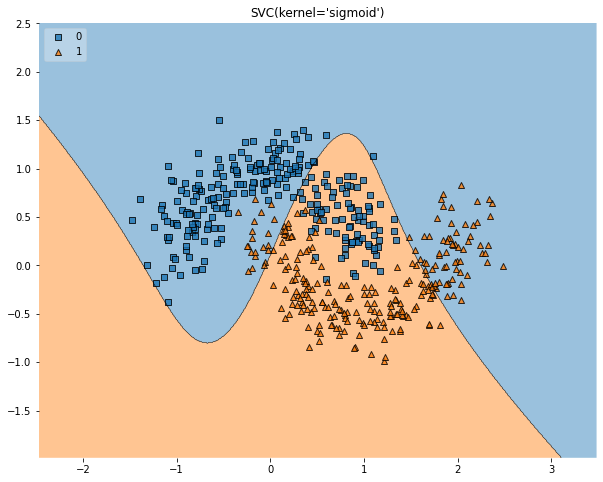

In [20]:
### YOUR CODE HERE
model = SVC(kernel='poly')
plot_decisions(moons_points,moons_labels, model)
model = SVC(kernel='rbf')
plot_decisions(moons_points,moons_labels, model)
model = SVC(kernel='sigmoid')
plot_decisions(moons_points,moons_labels, model)

The result has become much better for rbf and poly , but sigmoid is not suitable for this task

accuracy:  0.856


accuracy:  0.946


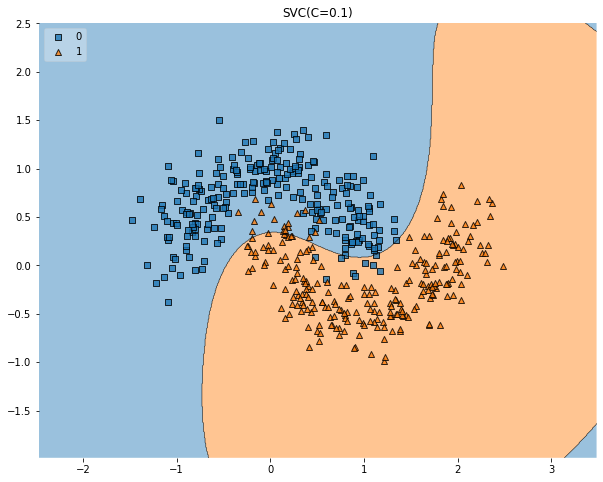

accuracy:  0.974


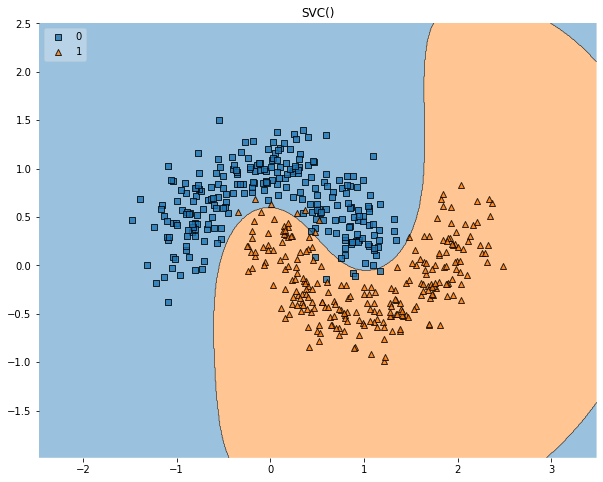

accuracy:  0.98


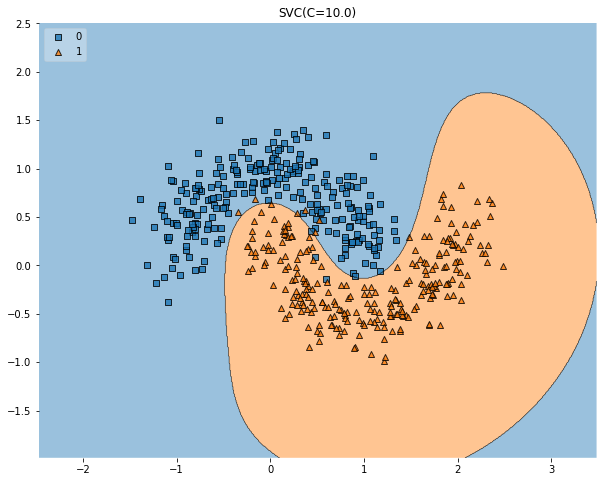

accuracy:  0.982


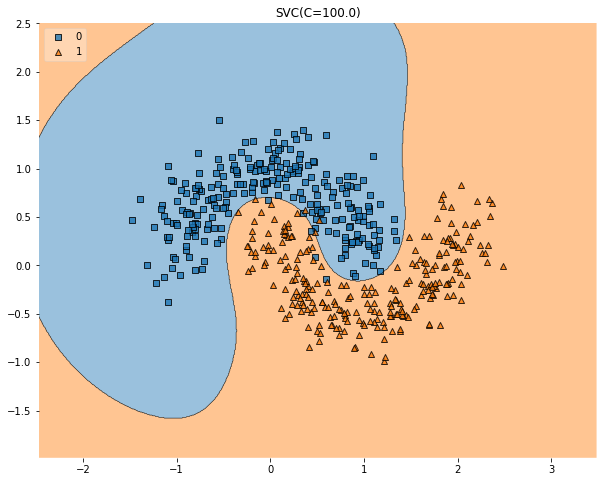

accuracy:  0.984


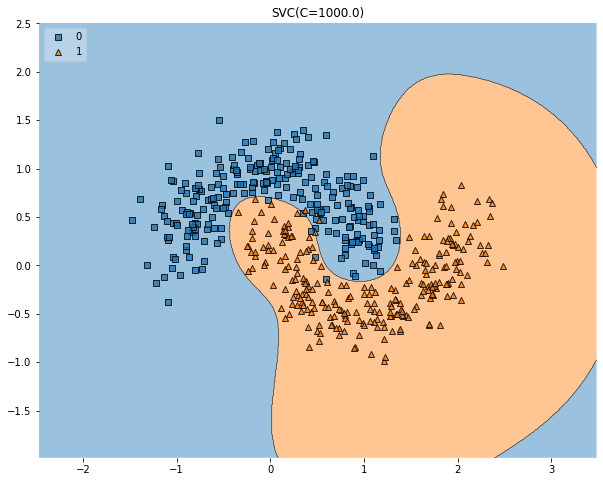

accuracy:  0.99


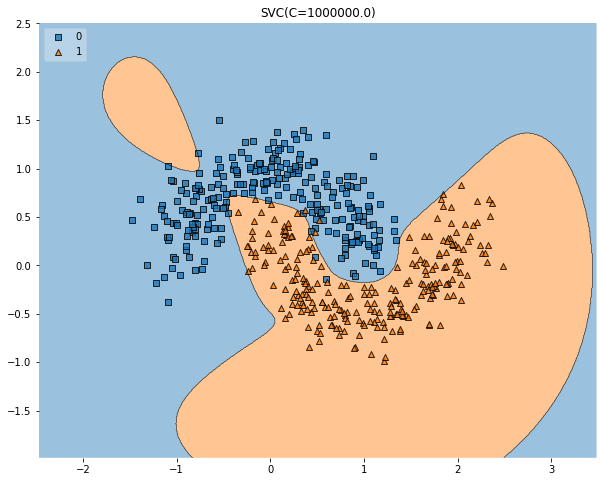

In [21]:
C = np.array([0.01, 0.1, 1, 10, 100,1000,1e6])
for C in C:
    model = SVC(C=C, kernel='rbf')
    plot_decisions(moons_points,moons_labels, model)


accuracy:  0.768


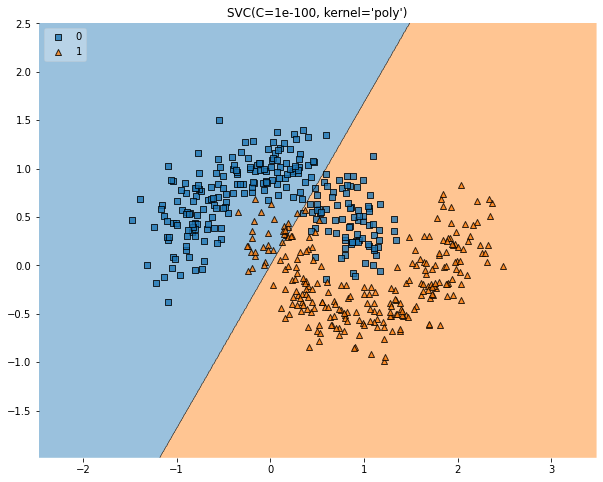

accuracy:  0.774


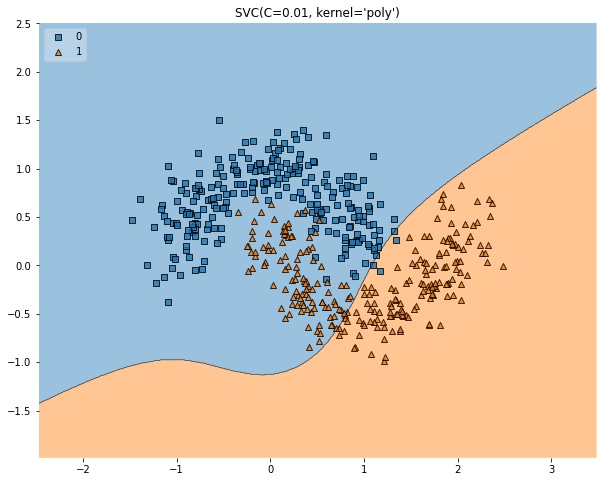

accuracy:  0.808


accuracy:  0.906


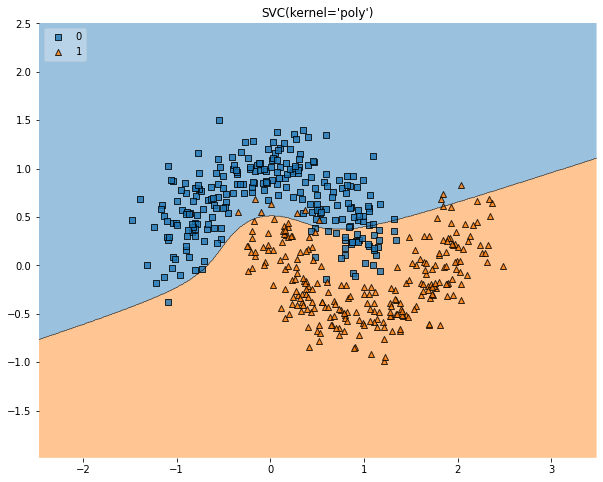

accuracy:  0.896


accuracy:  0.892


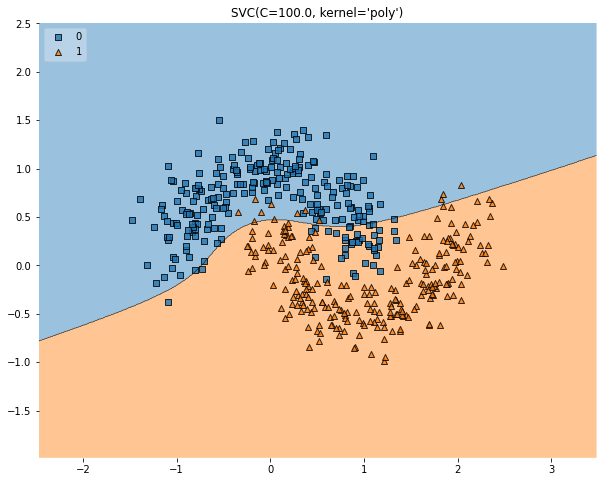

accuracy:  0.892


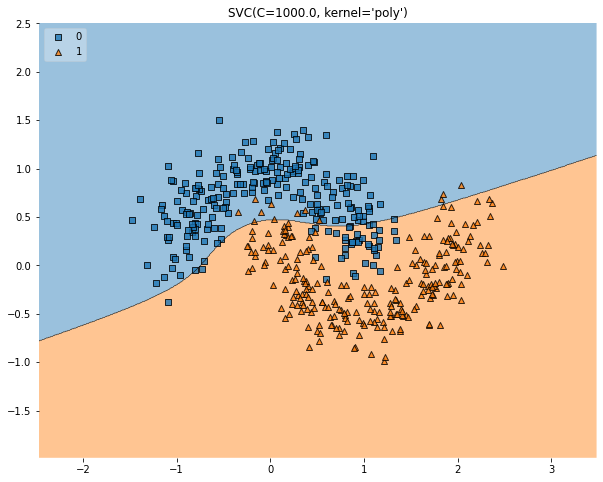

accuracy:  0.892


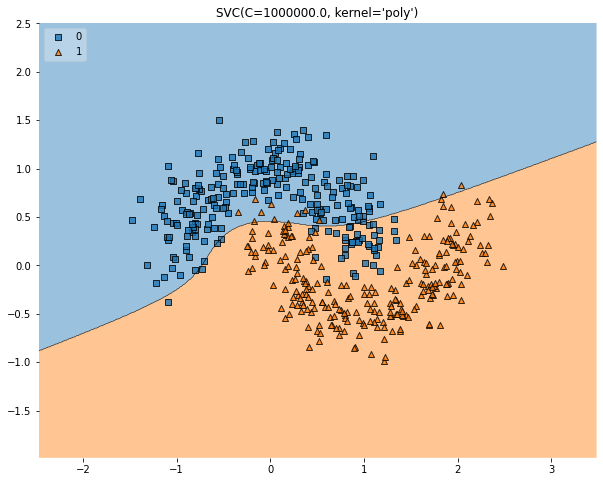

In [67]:
C = np.array([1e-20, 0.01, 0.1, 1, 10, 100,1000,1e6])
for C in C:
    model = SVC(C=C, kernel='poly')
    plot_decisions(moons_points,moons_labels, model)

accuracy:  0.782


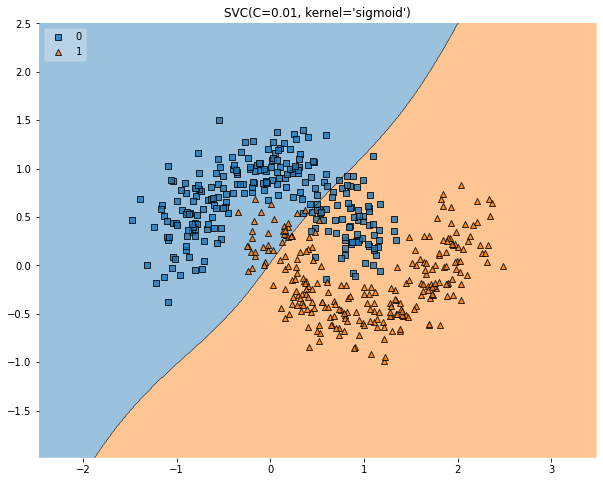

accuracy:  0.712


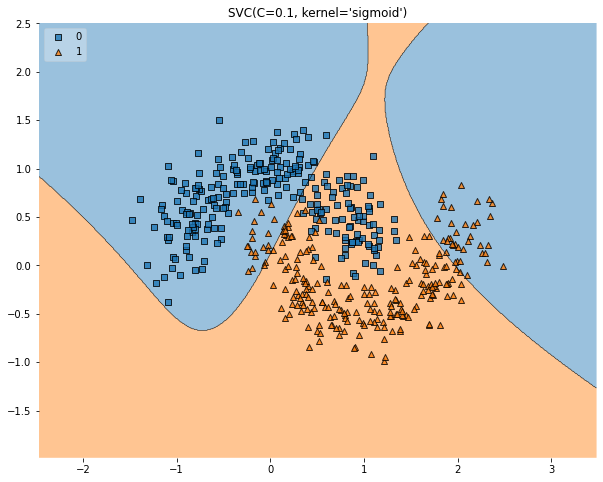

accuracy:  0.648


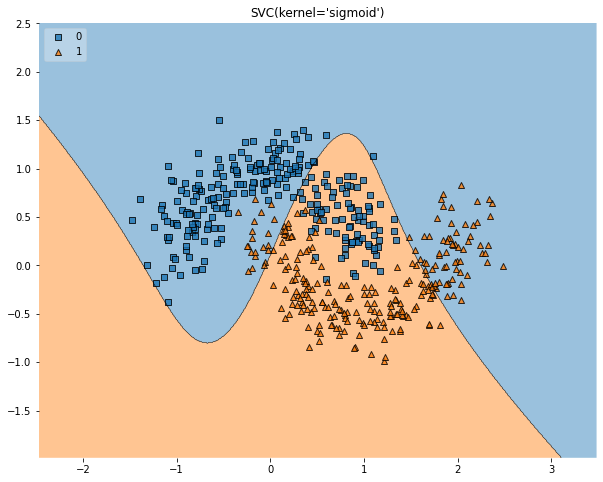

accuracy:  0.644


accuracy:  0.644


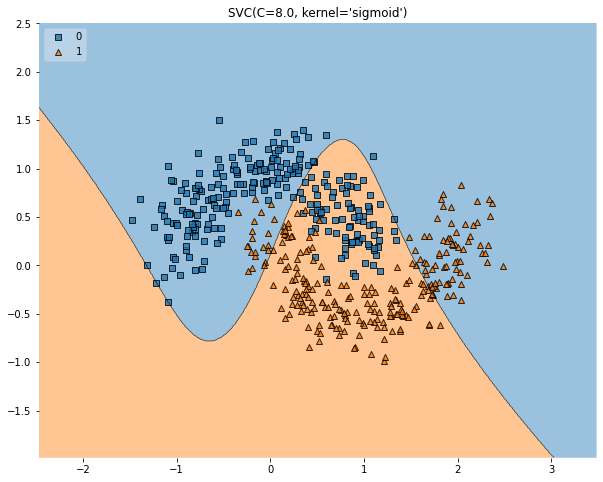

accuracy:  0.644


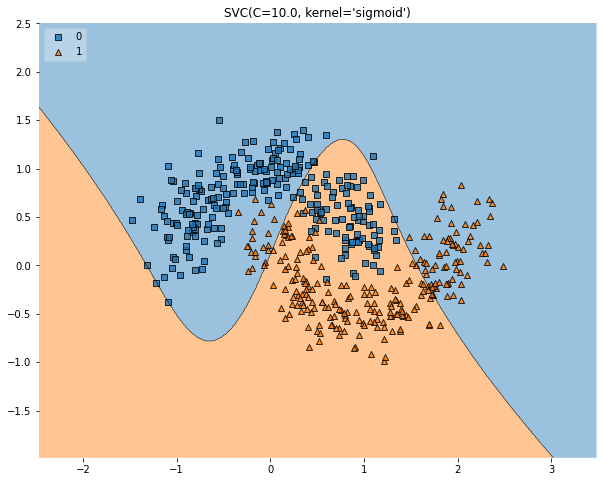

accuracy:  0.642


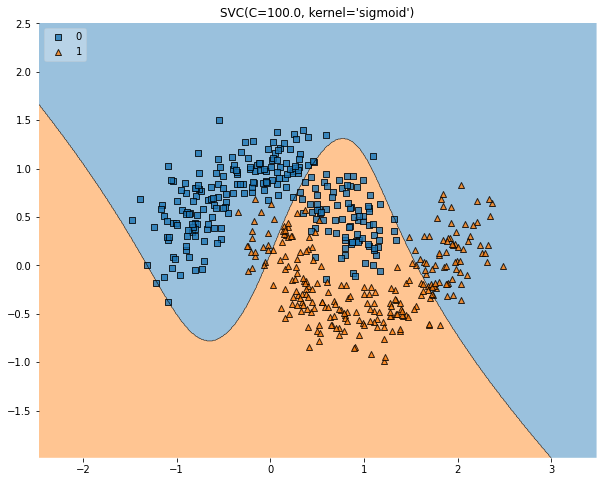

accuracy:  0.642


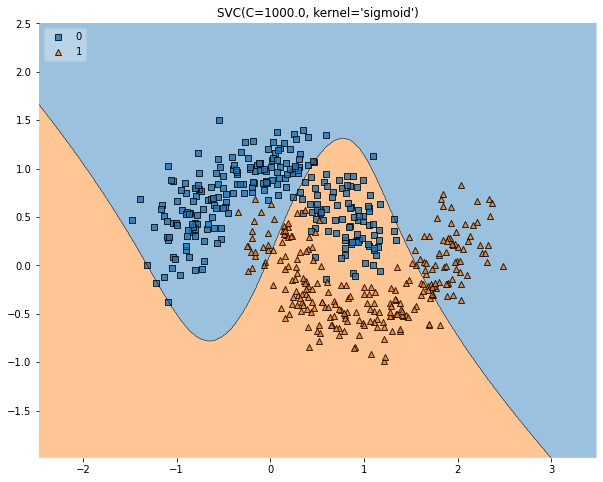

accuracy:  0.642


In [50]:
C = np.array([0.01, 0.1, 1, 5, 8, 10, 100,1000,1e6])
for C in C:
    model = SVC(C=C, kernel='sigmoid')
    plot_decisions(moons_points,moons_labels, model)

RBF: copes better than other methods
If the task is to divide this data as best as possible, then C=1e6 copes best of all
and if we then want to predict, then we can notice that with C = 1e6, it is very retrained, which is bad, so if we want to predict, then I would take C = 1/10/100
Poly: copes worse than rbf and at C=1 gave better results
Sigmoid: copes the worst with this task

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [5]:
poly = PolynomialFeatures(4)
X_transform = poly.fit_transform(moons_points)

model = LogisticRegression(max_iter=10000, multi_class='multinomial',solver='saga')
model.fit(X_transform, moons_labels)
y_pred = model.predict(X_transform)

print("accuracy: ", accuracy_score(moons_labels, y_pred))

accuracy:  0.974


In [7]:
x = np.arange(-1.6, 2.6, 0.01)
y = np.arange(-1.4, 2, 0.01)
xx, yy = np.meshgrid(x, y)

X_plot_raw = np.c_[xx.ravel(), yy.ravel()]
X_plot = poly.fit_transform(X_plot_raw)

Z = model.predict(X_plot)
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(7, 5))
plt.pcolormesh(xx, yy, Z, cmap='rainbow')
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels, edgecolors='k', cmap='rainbow')

<ipython-input-7-362581464e30>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='rainbow')


Parameter 4 for Polynomial Features() gave the best result.
but svm with kernel = 'rbf' and parameter C = 1e6 gave a better result, because it can retrain

Since the tree is able to retrain, it is very interesting how DecisionTreeClassifier will work

accuracy:  1.0


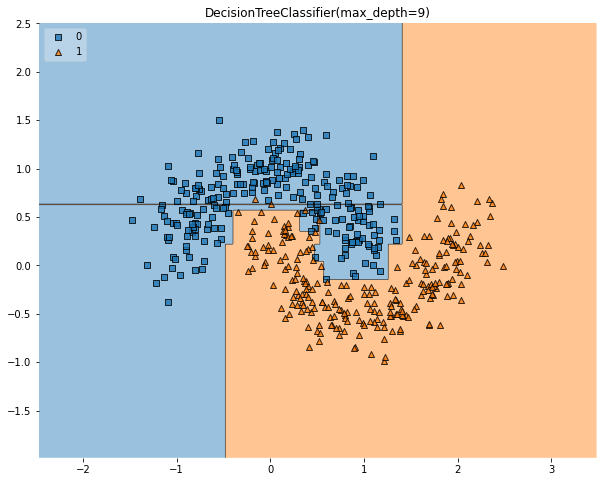

In [118]:
clf = DecisionTreeClassifier(max_depth=9)
plot_decisions(moons_points,moons_labels, clf)

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

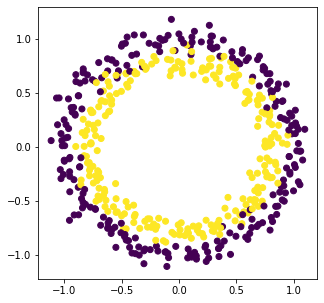

In [102]:
circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

accuracy:  0.944


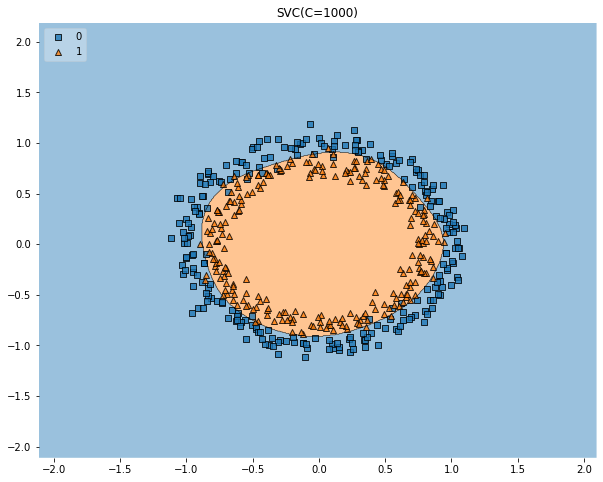

In [163]:
model = SVC(C=1000,kernel='rbf')
plot_decisions(circles_points,circles_labels, model)

In [104]:
poly = PolynomialFeatures(3)
X_transform = poly.fit_transform(circles_points)

model = LogisticRegression(max_iter=500, multi_class='multinomial',solver='saga')
model.fit(X_transform, circles_labels) # Получили наши веса 
y_pred = model.predict(X_transform)

print("accuracy: ", accuracy_score(circles_labels, y_pred))

accuracy:  0.94


In [105]:
x = np.arange(-1.5, 1.5, 0.01)
y = np.arange(-1.5, 1.5, 0.01)
xx, yy = np.meshgrid(x, y)

X_plot_raw = np.c_[xx.ravel(), yy.ravel()]
X_plot = poly.fit_transform(X_plot_raw)

Z = model.predict(X_plot)
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(7, 5))
plt.pcolormesh(xx, yy, Z, cmap='rainbow')
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=moons_labels, edgecolors='k', cmap='rainbow')

<ipython-input-105-4c90903ac4f2>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='rainbow')


In [119]:
#For the interest
clf = DecisionTreeClassifier(max_depth=14)
plot_decisions(circles_points,circles_labels, clf)

accuracy:  1.0


And even more:

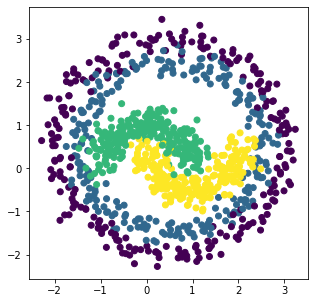

In [120]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

## SVM with kernel='rbf'

accuracy:  0.952


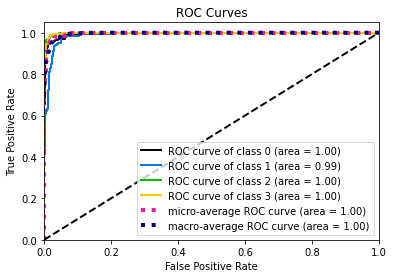

In [121]:
model = SVC(C=1e3, kernel='rbf', probability=True)
plot_decisions(points,labels, model)
y_pred = model.predict_proba(points)
scikitplot.metrics.plot_roc(labels, y_pred)
plt.show()

you may notice that svm has retrained a bit $\newline$
here we can safely say that poly and sigmoid will work very poorly

## PolynomialFeatures

In [144]:
poly = PolynomialFeatures(3)
X_transform = poly.fit_transform(points)

model = LogisticRegression(max_iter=1000, multi_class='multinomial',solver='saga')
model.fit(X_transform, labels) # Получили наши веса 
y_pred = model.predict(X_transform)

print("accuracy: ", accuracy_score(labels, y_pred))

accuracy:  0.913


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


<ipython-input-145-9ae69aa15a55>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='rainbow')


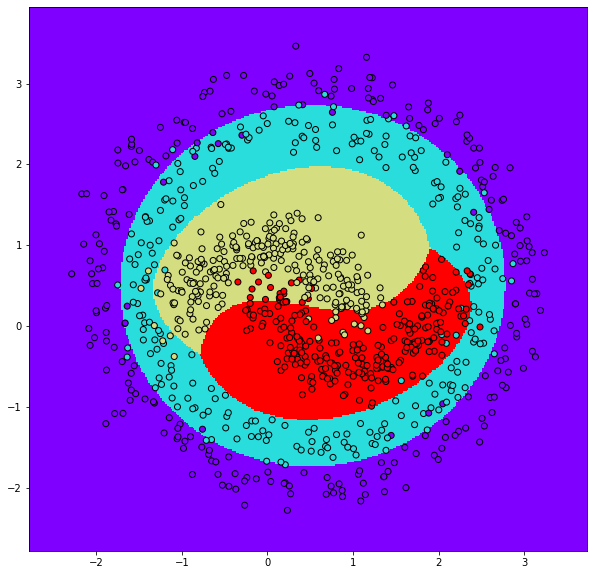

In [145]:
x_min, x_max = points[:, 0].min() - .5, points[:, 0].max() + .5
y_min, y_max = points[:, 1].min() - .5, points[:, 1].max() + .5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_plot_raw = np.c_[xx.ravel(), yy.ravel()]
X_plot = poly.fit_transform(X_plot_raw)

Z = model.predict(X_plot)
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(10, 10))
plt.pcolormesh(xx, yy, Z, cmap='rainbow')
plt.scatter(points[:, 0], points[:, 1], c=labels, edgecolors='k', cmap='rainbow')

## Decision Tree 

accuracy:  1.0


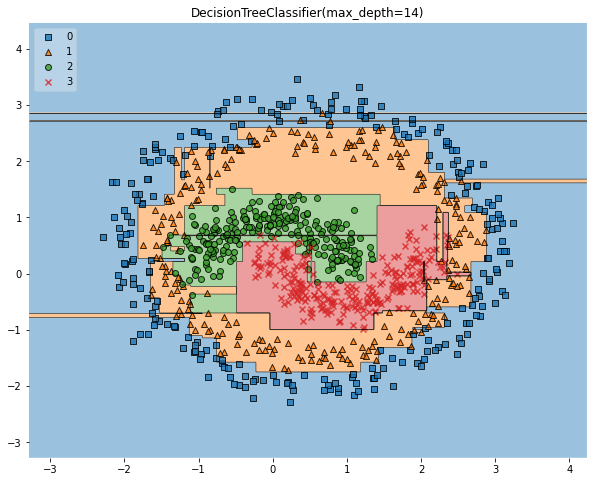

CPU times: user 397 ms, sys: 42.5 ms, total: 439 ms
Wall time: 457 ms


In [150]:
%%time
clf = DecisionTreeClassifier(max_depth=14)
plot_decisions(points,labels, clf)
y_pred = clf.predict_proba(points)


## Random Forest

accuracy:  1.0


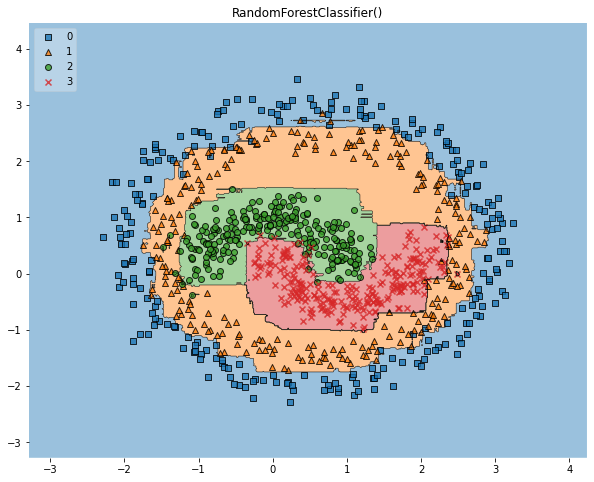

CPU times: user 3.09 s, sys: 131 ms, total: 3.22 s
Wall time: 3.65 s


In [48]:
%%time
model = RandomForestClassifier()
plot_decisions(points,labels, model)

RandomForest smoother than Decision Tree

The idea came up to combine the svm method with trees so that the result would be smoother and more accurate

## Stacking Decision Tree with SVM

In [158]:
estimators = [('rf', DecisionTreeClassifier(max_depth=14)), ('svc', SVC(C=1e3, kernel='rbf'))]

clf = StackingClassifier(estimators=estimators, final_estimator=SVC(C=1e3, kernel='rbf'))
plot_decisions(points,labels, clf)

accuracy:  0.959


## Random Forest Tree with SVM

accuracy:  0.963


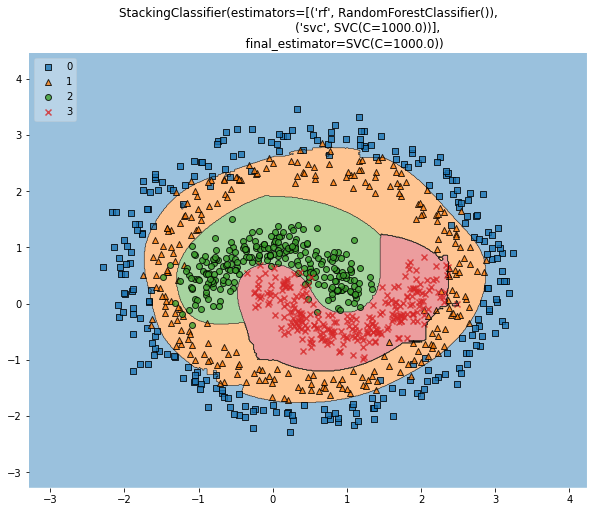

In [159]:
estimators = [('rf', RandomForestClassifier()), ('svc', SVC(C=1e3, kernel='rbf'))]
clf = StackingClassifier(estimators=estimators, final_estimator=SVC(C=1e3, kernel='rbf'))
plot_decisions(points,labels, clf)

but this unfortunately did not give strong changes in the result, but the pictures turned out to be beautiful

however, it seems to me that this method of Stacking would show the best result of all on $\textbf{the test data}$